# Appendix

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.integrate as integrate

sns.set(style="white")

## Appendix 1
\
\
$x \sim \mathcal{CB}(L) \iff P(x) \propto e^{Lx}, \quad x \in [-1, 1]\subset \mathbb{R}$
\
\
Below we provide a Python implementation of the continuous Bernoulli distributions: $\mathcal{CB}(L)$, parametrized by the log odds L and adjusted to the [-1,1] interval.

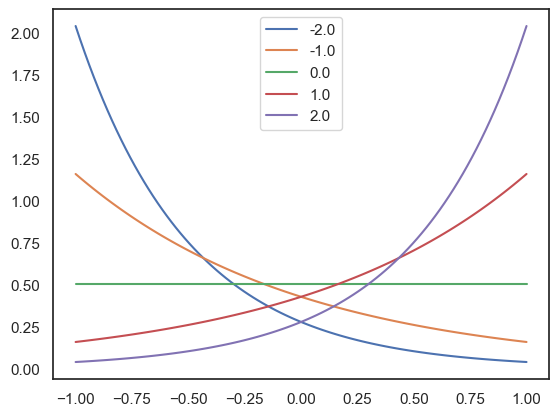

In [2]:
def CB(x, b, logodds=True):
    if not logodds:
        b=np.log(b/(1-b))
    if np.isclose(b, 0):
        return np.ones_like(x)/2
    else:
        return b * np.exp(b*x) / (2*np.sinh(b)) 
    
# Plot some examples
delta = 100
sigma = np.linspace(-1, 1, delta)
for b in np.linspace(-2, 2, 5):
    p_sigma = CB(sigma, b)
    sns.lineplot(x=sigma, y=p_sigma, label=b)

## Appendix 2

Derivation of the exponential form of the continuous Bernoulli distribution, parametrized by the log odds L and adjusted to the [-1,1] interval.

$P(x; L) = \frac{e^{Lx}}{\int_{-1}^1 e^{Lx}} = \frac{e^{Lx}}{ \frac{e^L - e^{-L}}{L}} = L \frac{e^{Lx}}{2sinh(L)}$



## Appendix 3

Visualization of the likelihood function with various parameters, in python.

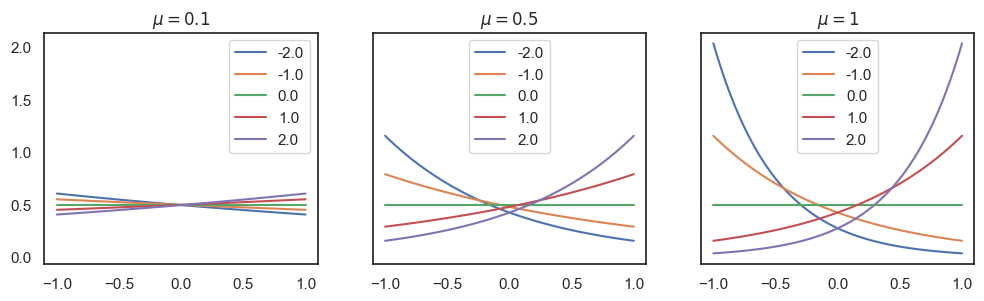

In [4]:
delta = 100
s_i = np.linspace(-1, 1, delta)

fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for idx, mu in enumerate([0.1, 0.5, 1]):
    for w_i in np.linspace(-2, 2, 5):
            p_mu = CB(s_i, w_i*mu)
            sns.lineplot(x=s_i, y=p_mu, ax=axes[idx], label=w_i).set(title=f"$\\mu={mu}$")

## Appendix 4

:::{math}
\mathbb{E}_{\mathcal{CB}(b)}[\sigma] &= \int \sigma \frac{ e^{b \sigma} }{ 2sinh(b) } d \sigma
&= \frac{ b \left( \frac{(b-1)e^b}{b^2} + \frac{(b+1)e^-b}{b^2} \right) }{ 2sinh(b) } \\
&= \coth(b) - \frac{1}{b}
:::

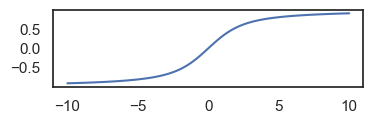

In [5]:
#| label: si-sigmoid
bs = np.linspace(-10, 10, 100)
plt.figure(figsize=(4, 1))
sns.lineplot(x=bs, y=1/np.tanh(bs) - 1/bs) # coth(b) - 1/b == 1/2 sech^2(b)
plt.show()

## Appendix 5

Let $x ∈ ℝ^n$ denote the system’s states (internal, blanket, and external states). 
The drift can be decomposed into a gradient part (from a potential U) and a solenoidal part R:
\
\
$ẋ = −∇U(x) + R(x)$
\
\
where $R = −Rᵀ$ is antisymmetric in state‐space.
\
\
The probability density $p(x, t)$ over states evolves according to the Fokker–Planck equation:
\
\
$∂ₜp(x,t) = −∇ · [ (−∇U + R) p(x,t) ] + diffusion terms.$
\
\
Because $R$ is antisymmetric $(∇ · (R p(x)) = 0)$ under the blanket‐partition constraints, we get
\
\
$∇ · (R p) = R : ∇p + p ∇ · R = 0$
\
\
(the colon denotes contraction). For a generic network, that term may not vanish—but the Markov‐blanket factorization forces any solenoidal flow to be purely tangential (no radial component in probability space).
\
\
In steady state $(∂ₜp = 0)$, only the gradient term $−∇U$ influences $p(x)$. The stationary (nonequilibrium) distribution is
\
\
$ p(x) ∝ exp{ −U(x) }$,
\
\
determined solely by the symmetric (potential) part −∇U. The antisymmetric $R$ does not reweight $p(x)$; it just circulates probability around isocontours of $U$.

In most NESS systems, antisymmetric flows do alter the stationary measure. Under particular‐partition (Markov‐blanket) constraints, however, the internal–external factorization ensures that solenoidal (antisymmetric) flows remain divergence‐free, leaving the Boltzmann‐like steady distribution intact.
This is why, in these Markov‐blanketed systems, one can have persistent solenoidal currents (nonequilibrium flows) yet preserve a stationary distribution that depends only on the symmetric part of the couplings.



## Appendix 6
\
\
**Detailed derivation of $\dfrac{\partial F}{\partial b_q}$**
\
\
**1. Subsitute our parametrization into F**
\
\
Let's start with substituting our parametrization into eq. [](#f-complexity-accuracy).
\
\
**1a. Accuracy term**
\
\
From the RBM marginalization (eq. [](#rmb-to-hopfield)):
\
\
$
E(\bm{\sigma}) = \underbrace{-b_i\sigma_i - \sum_{j\neq i}J_{ij}\sigma_i\sigma_j}_{\text{Terms with } \sigma_i} \underbrace{-\sum_{j\neq i}b_j\sigma_j - \frac{1}{2}\sum_{j,k\neq i}J_{jk}\sigma_j\sigma_k}_{\text{Terms without } \sigma_i}
$
\
\
Here, $-b_i\sigma_i$ becomes constant, since $\sigma_i$ is fixed. So we get:
\
\
$
P(\sigma_{\backslash i}|\sigma_i) \propto \exp\left(\sum_{j\neq i}(b_j + J_{ij}\sigma_i)\sigma_j + \frac{1}{2}\sum_{j,k\neq i}J_{jk}\sigma_j\sigma_k\right)
$
\
\
Taking expectation of $\ln P(\sigma_{\backslash i}|\sigma_i)$ under $q(σ_i)$:
\
\
$
\mathbb{E}q[\ln P(σ_{\backslash i}|σ_i)] = \text{const} + \sum_{j\neq i}b_jσ_j + S(b_q)\sum_{j\neq i}J_{ij}σ_j + \frac{1}{2}\sum_{j,k\neq i}J_{jk}σ_jσ_k
$
\
\
Where $S(b_q) = \mathbb{E}_q[σ_i] = \coth b_q - 1/b_q$ is the expected value of the $\mathcal{CB}$, a sigmoid function of the bias (#supplementary-information-4)).
\
\
**1b. Complexity term**
\
\
The complexity term in eq. [](#f-complexity-accuracy) is simply the KL-divergence term between two $\mathcal{CB}$ distributions. For $\mathcal{CB}$ distributions: 
\
\
$q(x) = \frac{b_q}{2\sinh b_q}e^{b_q x},\quad p(x) = \frac{b}{2\sinh b}e^{b x}$
\
\
• KL divergence definition:
\
\
$
D_{KL} = \int_{-1}^1 q(x) \ln\frac{q(x)}{p(x)} dx = \mathbb{E}_q[\ln q(x) - \ln p(x)]
$
\
\
• Expand log terms:
\
\
$
\ln q(x) = \ln b_q - \ln(2\sinh b_q) + b_q x
$
\
\
$
\ln p(x) = \ln b - \ln(2\sinh b) + b x
$
\
\
• Subtract log terms:
\
\
$
\ln\frac{q(x)}{p(x)} = \ln\frac{b_q}{b} + \ln\frac{\sinh b}{\sinh b_q} + (b_q - b)x
$
\
\
• Take expectation under q(x):
\
\
$
D_{KL} = \ln\frac{b_q}{b} + \ln\frac{\sinh b}{\sinh b_q} + (b_q - b)\mathbb{E}_q[x]
$
\
\
• Compute expectation $\mathbb{E}_q[x]$:
\
\
$
\mathbb{E}_q[x] = \int_{-1}^1 x \frac{b_q e^{b_q x}}{2\sinh b_q} dx = \frac{1}{2\sinh b_q}\left[\frac{e^{b_q x}}{b_q^2}(b_q x - 1)\right]_{-1}^1
$
\
\
• Evaluate at bounds:
\
\
$
= \frac{1}{2\sinh b_q}\left(\frac{e^{b_q}(b_q - 1) - e^{-b_q}(-b_q - 1)}{b_q^2}\right)
$
\
\
• Simplify using hyperbolic identities:
\
\
$
= \frac{(b_q \cosh b_q - \sinh b_q)}{b_q^2 \sinh b_q} = \coth b_q - \frac{1}{b_q}
$
\
\
• Final substitution for the complexity term:
\
\
$
D_{KL} = \ln\frac{b_q \sinh b}{b \sinh b_q} + (b_q - b)\left(\coth b_q - \frac{1}{b_q}\right)
$
\
\
**1c. Combining the two terms**
\
\
Combining the two terms, we get the following expression for the free energy:
\
\
$
F = \ln\left(\frac{b_q}{b}\right) + \ln\left(\frac{\sinh(b)}{\sinh(b_q)}\right) + (b_q - b) S(b_q) - \sum_{j \ne i} \left( b_j + S(b_q) J_{ij} \right) \sigma_j - \dfrac{1}{2} \sum_{j \ne i} \sum_{k \ne i} J_{jk} \sigma_j \sigma_k + C
$
\
\
where C denotes all constants in the equation that are independent of $\sigma or b_q$.
\
\
**2. Free Energy partial derivative calculation**
\
\
• First, we differentiate the log terms:
\
\
$
\frac{\partial}{\partial b_q}\left[\ln\frac{b_q}{b} + \ln\frac{\sinh b}{\sinh b_q}\right] = \frac{1}{b_q} - \coth b_q
$
\
\
• Then, the KL core term:
\
\
$
\frac{\partial}{\partial b_q}\left[(b_q - b)S(b_q)\right] = S(b_q) + (b_q - b)\frac{dS}{db_q}
$
\
\
• The linear terms:
\
\
$
\frac{\partial}{\partial b_q}\left[-\sum_{j≠i}(b_j + S(b_q)J_{ij})\sigma_j\right] = -\sum_{j≠i}J_{ij}\sigma_j\frac{dS}{db_q}
$
\
\
• The constants vanish.
\
\
• Now, combining all terms:
\
\
$
\frac{\partial F}{\partial b_q} = \left(\frac{1}{b_q} - \coth b_q\right) + \left(S(b_q) + (b_q - b)\frac{dS}{db_q}\right) - \sum_{j≠i}J_{ij}\sigma_j\frac{dS}{db_q}
$
\
\
• Substituting $S(b_q) = \coth b_q - 1/b_q$:
\
\
$
= \left(\frac{1}{b_q} - \coth b_q\right) + \left(\coth b_q - \frac{1}{b_q} + (b_q - b)\frac{dS}{db_q}\right) - \sum_{j≠i}J_{ij}\sigma_j\frac{dS}{db_q}
$
\
\
• Cancel terms:
\
\
$
\cancel{\frac{1}{b_q}} \cancel{- \coth b_q} + \cancel{\coth b_q} \cancel{- \frac{1}{b_q}} + (b_q - b)\frac{dS}{db_q} - \sum_{j≠i}J_{ij}\sigma_j\frac{dS}{db_q}
$
\
\
Gives us the **final derivative**:
\
\
$
\frac{∂F}{∂b_q} = \left(b_q - b - \sum_{j\neq i}J_{ij}σ_j\right)\frac{dS}{db_q}
$
\
\
Where $\frac{dS}{db_q} = -csch^2 b_q + \frac{1}{b_q^2}$.
\
\
Setting the derivative to zero and solving for $b_q$, we get:
$
b_q = b + \sum_{j \ne i} J_{ij} \sigma_j
$
\
\
Now we remember that the expected value of the $\mathcal{CB}$ is the Langevin function of its bias -, $\mathbb{E}(x) = coth(b) - 1/b$ ([](#supplementary-information-4)). For simplicity, we will denote it as $L(x)$. Now we can write:
\
$
\mathbb{E}_{q}[\sigma_i] = L(b_q) = L \left( b + \sum_{j \ne i} J_{ij} \sigma_j \right)
$
\
\
**Q.E.D.**

